Index(['timestamp', ' name', ' pstate', ' temperature.gpu',
       ' utilization.gpu [%]', ' utilization.memory [%]',
       ' memory.total [MiB]', ' memory.free [MiB]', ' memory.used [MiB]'],
      dtype='object')


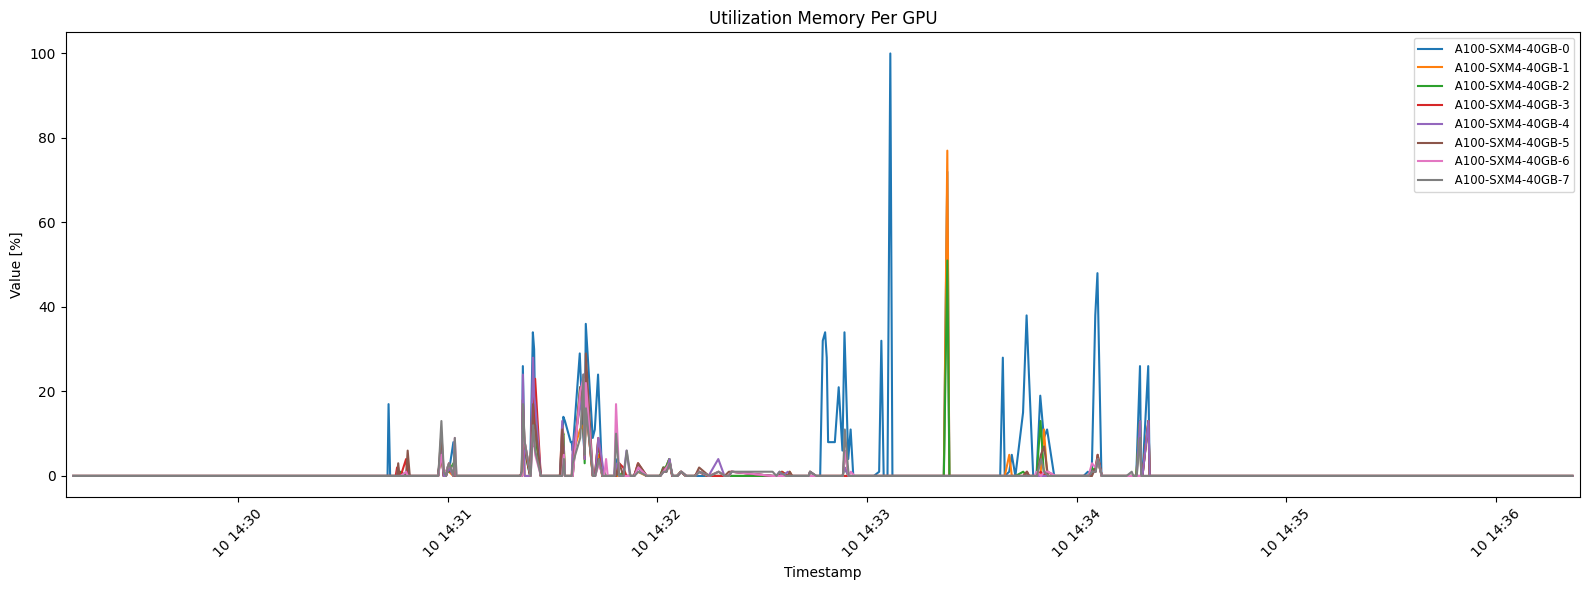

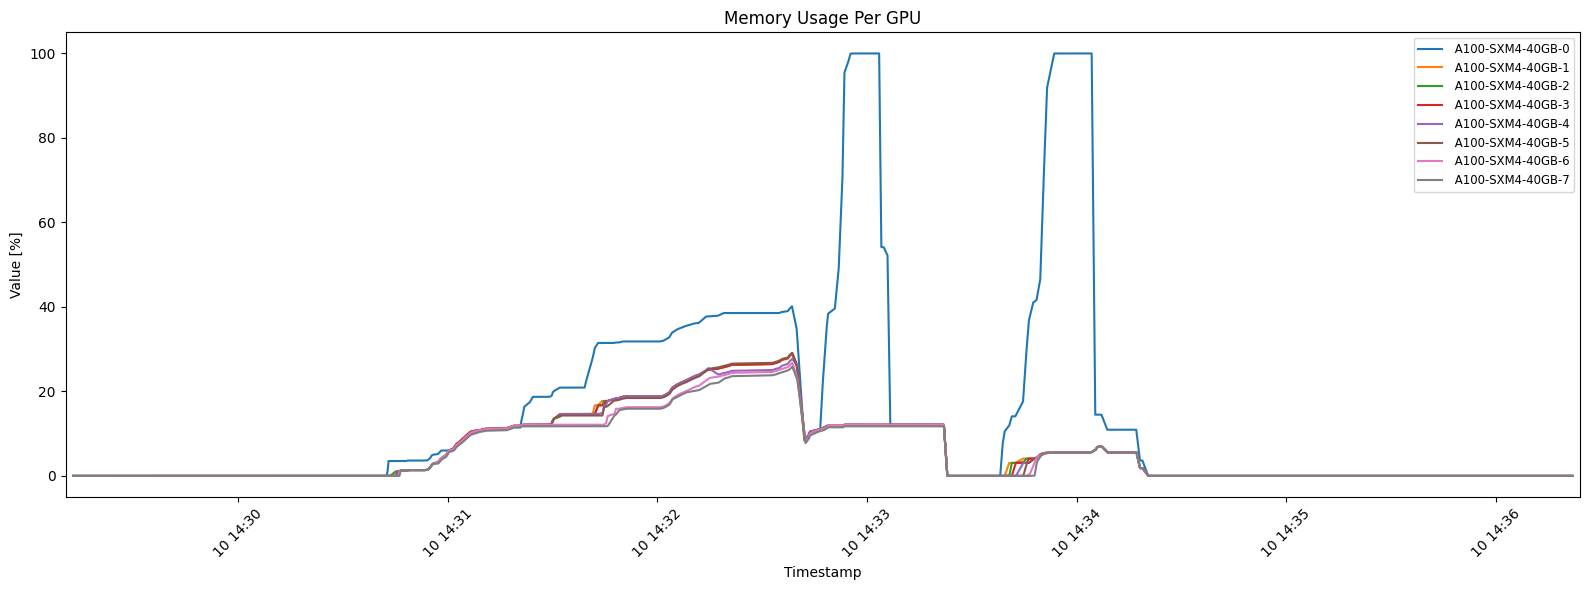

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file_name = 'gpu.csv'
df = pd.read_csv(file_name)  # Ganti 'nama_file.csv' dengan nama file CSV Anda
df = df[df['timestamp'] != 'timestamp']
print(df.columns)
# Beri labeling GPU
df.reset_index(drop=True, inplace=True)

df[' memory.used [MiB]'] = df[' memory.used [MiB]'].str[:-4]
df[' memory.total [MiB]'] = df[' memory.total [MiB]'].str[:-4]

df[' memory.used [MiB]'] = pd.to_numeric(df[' memory.used [MiB]'], errors='coerce')
df[' memory.total [MiB]'] = pd.to_numeric(df[' memory.total [MiB]'], errors='coerce')
df['real memory usage'] = df[' memory.used [MiB]'] / df[' memory.total [MiB]']
df['real memory usage'] = df['real memory usage'] * 100


counter = 0
for index, row in df.iterrows():
    if counter == 8:
        counter = 0
    df.at[index, ' name'] =  df.at[index, ' name'] + "-" + str(counter)
    counter += 1
# print(df.head(10))

# Mengonversi kolom 'timestamp' ke dalam format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Mengelompokkan data berdasarkan nama GPU
grouped = df.groupby(' name')

groups_to_drop = []

# Filtering out specific groups
filtered_data = df[~df[' name'].isin(groups_to_drop)]

# Re-grouping after filtering
grouped_filtered = filtered_data.groupby(' name')

# Plotting grafik untuk setiap GPU
plt.figure(figsize=(16, 6))

for name, group in grouped_filtered:
    plt.plot(group['timestamp'], group[' utilization.gpu [%]'].str.rstrip(' %').astype(int), label=name)


plt.xlabel('Timestamp')
plt.ylabel('Value [%]')
plt.title('Utilization Memory Per GPU')
plt.legend(fontsize='small')
plt.xticks(rotation=45)
plt.gca().margins(x=0.005)
plt.tight_layout()
plt.show()



# Plotting grafik untuk setiap GPU
plt.figure(figsize=(16, 6))

for name, group in grouped_filtered:
    plt.plot(group['timestamp'], group['real memory usage'], label=name)

plt.xlabel('Timestamp')
plt.ylabel('Value [%]')
plt.title('Memory Usage Per GPU')
plt.legend(fontsize='small')
plt.xticks(rotation=45)
plt.gca().margins(x=0.005)
plt.tight_layout()
plt.show()